# Task # 2 - To Explore Supervised Machine Learning
Linear regression is a common Statistical Data Analysis technique. It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables.

# Task
 In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?


# Import all the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data

In [ ]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploring the our Dateset
1. check the Dataset Shape

In [ ]:
df.shape

(25, 2)

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Check the Null values in the DataSet

In [ ]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In the dataset there is no null values
So we processed ahead

# Visualizing the DataSet


In [ ]:
x=df[['Hours']]
y=df[['Scores']]

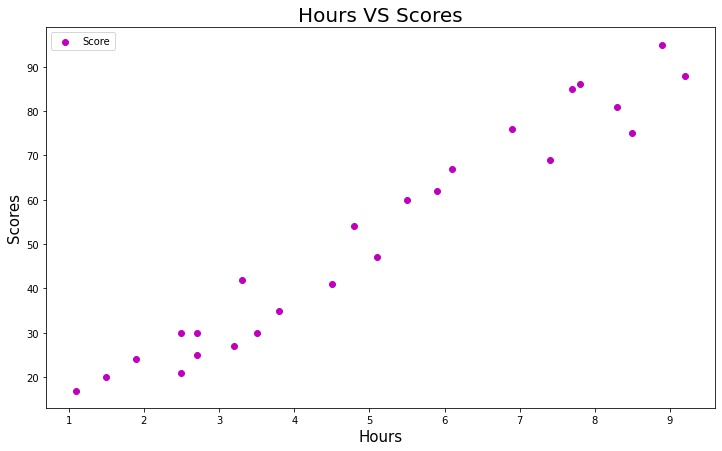

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,c='m',label='Score')
plt.title('Hours VS Scores',fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.legend()
plt.show()

# Creating ML Model
Lets store out features and target value in input, target variables respectively.

In [ ]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

Now we have to split out dataset into tain set and test set. Training Data:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.2, random_state=0)
print("Training size: {} , Testing size: {}".format(len(X_train), len(X_test)))

Training size: 20 , Testing size: 5


# Simple Linear Regression
Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called Simple Linear Regression.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_line = LinearRegression()

To train our model we will use .fit() method that takes 2 parameters--> (df_inputs, df_targets)

In [ ]:
reg_line.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

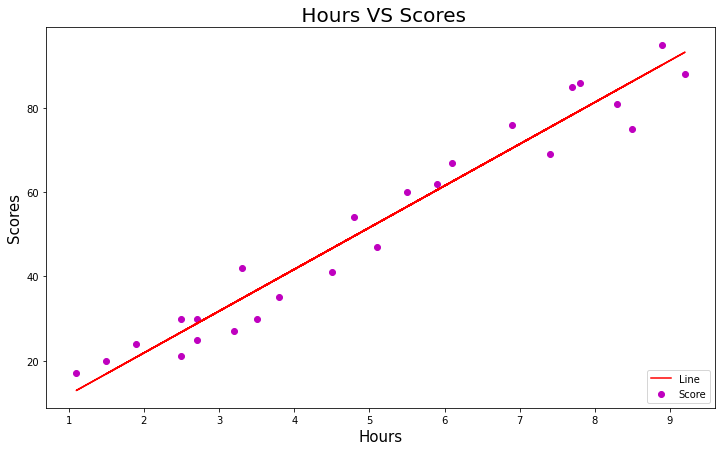

In [ ]:
line=reg_line.coef_*X+reg_line.intercept_
plt.figure(figsize=(12,7))
plt.scatter(X,y,c='m',label='Score')
plt.plot(x,line,c='r',label='Line')
plt.title(" Hours VS Scores",fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.legend(loc=4)
plt.show()

Our model has been trained successfully.

Now lets use our model to predict test data..

In [ ]:
reg_line.score(X_train, y_train)

0.9515510725211553

Predicting the Score

In [ ]:
y_pre = reg_line.predict(X_test)
y_pre

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
df_pre=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
df_pre

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Ploting the bar graph to see actual and predicted values

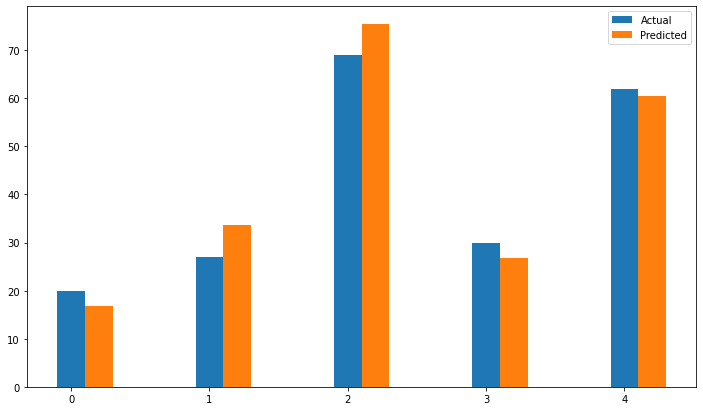

In [ ]:
houre_i=[2,4,6,8,10]
houre_index=np.arange(len(houre_i))
width=0.2
plt.figure(figsize=(12,7))
plt.bar(houre_index,y_test,width,label='Actual')
plt.bar(houre_index+width,y_pre,width,label='Predicted')
plt.legend()
plt.show()

In [ ]:
hour=9.25
pre_score=reg_line.predict([[9.25]])
print(f"No of Hour = {hour}")
print(f"Predicted Score = {pre_score[0]}")

No of Hour = 9.25
Predicted Score = 93.69173248737539


# Evaluting the model
calculate the Mean absolute Error, Mean Square Errorand Root Mean Square Error.

In [ ]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pre))
print("Mean Square Error",metrics.mean_squared_error(y_test,y_pre))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pre))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pre)))

Mean Absolute Error 4.183859899002982
Mean Square Error 21.598769307217456
Mean Absolute Error 4.183859899002982
Root Mean Squared Error 4.647447612100373


# Conclusion 
From above results we can say that if student study 9.25 hours then studnt get 93.69 Marks.


# ThankYou!!!!